# Program back propagation ini adalah code from scratch, setiap cell code di upgrade misalnya di cell pertama dipakai untuk import library, lalu cell berikutnya ada contoh dataset untuk kasus XOR, lalu ada dataset lebih banyak dengan 12 pola data. 

Dengan beberapa dataset itu silakan bandingkan hasilnya algoritma menggunakan learning rate, penambahan momentum, diskusikan dengan coach/student kalian.

## Library numpy yang digunakan

In [ ]:
# Import Packages

import numpy as np

print("Versi numpy yang digunakan adalah", np.__version__)

## Menambahkan set data dengan kasus XOR

### Set data 1 kasus XOR

In [ ]:
lvInput = np.array([[0, 0], [1, 1], [0, 1], [1, 0]]) # Dari data input x adalah 2
lvTarget = np.array([[0.05], [0.05], [0.95], [0.95]]) # Dari data target T adalah 1

### Set data 2

- Jika pakai dataset ini isi nilai Input_x menjadi 12 sesuai dengan jumlah pola 1 

In [ ]:
lvInput = np.array ([[0.1614, 0.1394, 0.1171, 0.1070, 0.1342, 0.1738, 0.4204, 0.6896, 0.6363, 0.3657, 0.2266, 0.1678],  #pola 1
                         [0.1394, 0.1171, 0.1070, 0.1342, 0.1738, 0.4204, 0.6896, 0.6363, 0.3657, 0.2266, 0.1678, 0.1439],  #pola 2
                         [0.1171, 0.1070, 0.1342, 0.1738, 0.4204, 0.6896, 0.6363, 0.3657, 0.2266, 0.1678, 0.1439, 0.1249],  #pola 3
                         [0.1070, 0.1342, 0.1738, 0.4204, 0.6896, 0.6363, 0.3657, 0.2266, 0.1678, 0.1439, 0.1249, 0.1013],  #pola 4
                         [0.1342, 0.1738, 0.4204, 0.6896, 0.6363, 0.3657, 0.2266, 0.1678, 0.1439, 0.1249, 0.1013, 0.1],     #pola 5
                         [0.1738, 0.4204, 0.6896, 0.6363, 0.3657, 0.2266, 0.1678, 0.1439, 0.1249, 0.1013, 0.1,    0.1179],  #pola 6
                         [0.4204, 0.6896, 0.6363, 0.3657, 0.2266, 0.1678, 0.1439, 0.1249, 0.1013, 0.1,    0.1179, 0.3678],  #pola 7
                         [0.6896, 0.6363, 0.3657, 0.2266, 0.1678, 0.1439, 0.1249, 0.1013, 0.1,    0.1179, 0.3678, 0.4838],  #pola 8
                         [0.6363, 0.3657, 0.2266, 0.1678, 0.1439, 0.1249, 0.1013, 0.1,    0.1179, 0.3678, 0.4838, 0.9],     #pola 9
                         [0.3657, 0.2266, 0.1678, 0.1439, 0.1249, 0.1013, 0.1,    0.1179, 0.3678, 0.4838, 0.9,    0.7017],  #pola 10
                         [0.2266, 0.1678, 0.1439, 0.1249, 0.1013, 0.1,    0.1179, 0.3678, 0.4838, 0.9,    0.7017, 0.5189],  #pola 11
                         [0.1678, 0.1439, 0.1249, 0.1013, 0.1,    0.1179, 0.3678, 0.4838, 0.9,    0.7017, 0.5189, 0.2394]]) #pola 12
    
lvTarget = np.array ([[0.1439], [0.1249], [0.1013], [0.1], [0.1179], [0.3678], [0.4838], [0.9], [0.7017], [0.5189], [0.2394], [0.1837]])

## Menambhakan layer input dan layer output


In [ ]:
Input_x = 12 # Nilainya sesuaikan dengan matrik Input misalnya pada contoh adalah 2
Output_y = 1 # Nilainya sesuaikan dengan matrik Output target misalnya pada contoh adalah 1

# Membangun class Back Propagation dan membuat input layer, hidden layer, dan output layer. Tapi, kita belum fokus untuk membuat algoritma feed forward dan algoritma back propagation.

In [ ]:


class BackPropagationNetwork:
    """A back-propagation network"""

    # Class members
    layerCount = 0
    shape = None
    weights = []

    # Class methods
    def __init__(self, layerSize):
        """Initialize the network"""

        # Layer info
        self.layerCount = len(layerSize) - 1
        self.shape = layerSize

        # Input/Output data from last run
        self._layerInput = []
        self._layerOutput = []

        # Create the weight arrays
        for (l1, l2) in zip(layerSize[:-1], layerSize[1:]):
            self.weights.append(np.random.normal(scale=0.1, size = (l2, l1+1)))


# If run as script, create a test object
if __name__ == "__main__":

    """
    Keterangan:
      =====bpn = BackPropagationNetwork((Input_x, 2, Output_y))=====
    - Input_x di input nilainya sesuai dengan banyaknya dimensi di pola 1,/
      misalnya pada data berikut [[0, 0], [1, 1], [0, 1], [1, 0]], karena pola pertama ada 2, maka nilianya kita input juga 2,\
      jadi input_x = 2
    - Nilai 2 antara Input_x dan Output_y itu adalah hidden layer, misalnya kita pakai 2, dan bisa di ganti sesui kebutuhan,\
      lalu dapat juka di buat menjadi 2-3-4 hidden layer misalnya, (Input_x, 15, 10, 3, Output_y)
      
    """
    bpn = BackPropagationNetwork((Input_x, 2, Output_y))
    print(bpn.shape)
    print(bpn.weights)



# Menambahkan algoritma feed forward dan fungsi aktivasi sigmoid

- Fungsi Aktivasi Sigmoid

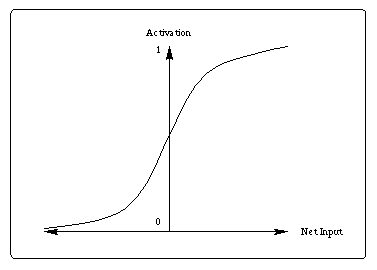

In [ ]:


class BackPropagationNetwork:
    """A back-propagation network"""

    # Class members
    layerCount = 0
    shape = None
    weights = []

    # Class methods
    def __init__(self, layerSize):
        """Initialize the network"""

        # Layer info
        self.layerCount = len(layerSize) - 1
        self.shape = layerSize

        # Input/Output data from last run
        self._layerInput = []
        self._layerOutput = []

        # Create the weight arrays
        for (l1, l2) in zip(layerSize[:-1], layerSize[1:]):
            self.weights.append(np.random.normal(scale=0.01, size = (l2, l1+1)))

    
    
    #Algoritma Feed Forward 
      
    def forwardProc(self, input):
        """Run the network based on the input data"""
    
        lnCases = input.shape[0]

        # Clear out the previous intermediate value lists
        self._layerInput = []
        self._layerOutput = []

        # Run it!
        for index in range(self.layerCount):
            # Determine layer input
            if index == 0:
                layerInput = self.weights[0].dot(np.vstack([input.T, np.ones([1, lnCases])])) # 
                # refrensi vstack: https://numpy.org/doc/stable/reference/generated/numpy.vstack.html
                # .T adalah array transpose, refrensi: https://docs.scipy.org/doc/numpy-1.5.x/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T
            else:
                layerInput = self.weights[index].dot(np.vstack([self._layerOutput[-1], np.ones([1, lnCases])]))

            self._layerInput.append(layerInput)
            self._layerOutput.append(self.sgm(layerInput))

        return self._layerOutput[-1].T
    
    # Transfer functions
    def sgm(self, x, Derivative=False):
        if not Derivative:
            return 1 / (1+np.exp(-x))
        else:
            out = self.sgm(x)
            return out*(1-out)



# If run as script, create a test object
if __name__ == "__main__":

    """
    Keterangan:
      =====bpn = BackPropagationNetwork((Input_x, 2, Output_y))=====
    - Input_x di input nilainya sesuai dengan banyaknya dimensi di pola 1,/
      misalnya pada data berikut [[0, 0], [1, 1], [0, 1], [1, 0]], karena pola pertama ada 2, maka nilianya kita input juga 2,\
      jadi input_x = 2
    - Nilai 2 antara Input_x dan Output_y itu adalah hidden layer, misalnya kita pakai 2, dan bisa di ganti sesui kebutuhan,\
      lalu dapat juka di buat menjadi 2-3-4 hidden layer misalnya, (Input_x, 15, 10, 3, Output_y)
      
    """
    bpn = BackPropagationNetwork((Input_x, 2, Output_y))
    print(bpn.shape)
    print(bpn.weights)

    # lvInput = np.array([[0, 0], [1, 1], [-1, 0.5]])
    lvOutput = bpn.forwardProc(lvInput)

    print("Input: {0}\nOutput: {1}".format(lvInput, lvOutput))

# Menambahkan train epoch, perbaikan error (backpropagation) dan learning rate (eta = η)

In [ ]:
from numpy.core.numeric import ones

class BackPropagationNetwork:
    """A back-propagation network"""

    # Class members
    layerCount = 0
    shape = None
    weights = []

    # Class methods
    def __init__(self, layerSize):
        """Initialize the network"""

        # Layer info
        self.layerCount = len(layerSize) - 1
        self.shape = layerSize

        # Input/Output data from last run
        self._layerInput = []
        self._layerOutput = []

        # Create the weight arrays
        for (l1, l2) in zip(layerSize[:-1], layerSize[1:]):
            self.weights.append(np.random.normal(scale=0.1, size = (l2, l1+1)))

    
    # Run method
    def forwardProc(self, input):
        """Run the network based on the input data"""
    
        lnCases = input.shape[0]

        # Clear out the previous intermediate value lists
        self._layerInput = []
        self._layerOutput = []

        # Run it!
        for index in range(self.layerCount):
            # Determine layer input
            if index == 0:
                layerInput = self.weights[0].dot(np.vstack([input.T, np.ones([1, lnCases])])) # 
                # refrensi vstack: https://numpy.org/doc/stable/reference/generated/numpy.vstack.html
                # .T adalah array transpose, refrensi: https://docs.scipy.org/doc/numpy-1.5.x/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T
            else:
                layerInput = self.weights[index].dot(np.vstack([self._layerOutput[-1], np.ones([1, lnCases])]))

            self._layerInput.append(layerInput)
            self._layerOutput.append(self.sgm(layerInput))

        return self._layerOutput[-1].T
    
    # Train Epoch Method
    def TrainEpoch(self, input, target, trainingRate = 0.2):
        """This method trains the network for one epoch"""

        delta = []
        lnCases = input.shape[0]

        # First run the network
        self.forwardProc(input)

        # Calculate our deltas
        for index in reversed(range(self.layerCount)):
            if index == self.layerCount - 1:
                # Compare to the target values
                output_delta = self._layerOutput[index] - target.T
                error = np.sum(output_delta**2)
                delta.append(output_delta * self.sgm(self._layerInput[index], True))
            else:
                # Compare to the following layer's delta
                delta_pullback = self.weights[index + 1].T.dot(delta[-1])
                delta.append(delta_pullback[:-1, :] * self.sgm(self._layerInput[index], True))

        # Compute weight deltas
        for index in range(self.layerCount):
            delta_index = self.layerCount - 1 - index

            if index == 0:
                layerOutput = np.vstack([input.T, np.ones([1, lnCases])])
            else:
                layerOutput = np.vstack([self._layerOutput[index - 1], np.ones([1, self._layerOutput[index - 1].shape[1]])])

            weightDelta = np.sum(\
                                 layerOutput[None,:,:].transpose(2, 0, 1) * delta[delta_index][None,:,:].transpose(2, 1, 0)\
                                 , axis = 0)
            
            self.weights[index] -= trainingRate * weightDelta

        return error
    
    # Transfer functions
    def sgm(self, x, Derivative=False):
        if not Derivative:
            return 1 / (1+np.exp(-x))
        else:
            out = self.sgm(x)
            return out*(1-out)



# If run as script, create a test object
if __name__ == "__main__":
    
    """
    Keterangan:
      =====bpn = BackPropagationNetwork((Input_x, 2, Output_y))=====
    - Input_x di input nilainya sesuai dengan banyaknya dimensi di pola 1,/
      misalnya pada data berikut [[0, 0], [1, 1], [0, 1], [1, 0]], karena pola pertama ada 2, maka nilianya kita input juga 2,\
      jadi input_x = 2
    - Nilai 2 antara Input_x dan Output_y itu adalah hidden layer, misalnya kita pakai 2, dan bisa di ganti sesui kebutuhan,\
      lalu dapat juka di buat menjadi 2-3-4 hidden layer misalnya, (Input_x, 15, 10, 3, Output_y)
      
    """
    bpn = BackPropagationNetwork((12, 5, 2, 1))
    print(bpn.shape)
    print(bpn.weights)

    #lvInput = np.array([[0, 0], [1, 1], [0, 1], [1, 0]])
    #lvTarget = np.array([[0.05], [0.05], [0.95], [0.95]])
    
    lnMax = 1000000
    lnErr = 1e-5
    for i in range(lnMax + 1):
        err = bpn.TrainEpoch(lvInput, lvTarget)
        if i % 2500 == 0:
            print("Iteration {0}\tError: {1:0.6f}".format(i, err))
        if err <= lnErr:
            print("Minimum error reached at iteration {0}".format(i))
            break
    
    lvOutput = bpn.forwardProc(lvInput)
    print("Input: {0}\nOutput: {1}".format(lvInput, lvOutput))


# Menambahkan momentum (alpha = α)

- Tujuan menambhakan momentum adalah untuk menghindari perubahan bobot yang mencolok akibat adanya data yang sangat berbeda dengan yang lain (outlier) sehingga mempercepat tercapai proses konvergensinya.

In [ ]:
#from numpy.core.numeric import ones
import numpy as np

class BackPropagationNetwork:
    """A back-propagation network"""

    # Class members
    layerCount = 0
    shape = None
    weights = []

    # Class methods
    def __init__(self, layerSize):
        """Initialize the network"""

        # Layer info
        self.layerCount = len(layerSize) - 1
        self.shape = layerSize

        # Data from last run
        self._layerInput = []
        self._layerOutput = []
        self._previousWeightDelta = []

        # Create the weight arrays
        for (l1, l2) in zip(layerSize[:-1], layerSize[1:]):
            self.weights.append(np.random.normal(scale=0.1, size = (l2, l1+1)))
            self._previousWeightDelta.append(np.zeros((l2, l1+1)))
    
    # forward method
    def forwardProc(self, input):
        """Run the network based on the input data"""
    
        lnCases = input.shape[0]

        # Clear out the previous intermediate value lists
        self._layerInput = []
        self._layerOutput = []

        # Run it!
        for index in range(self.layerCount):
            # Determine layer input
            if index == 0:
                layerInput = self.weights[0].dot(np.vstack([input.T, np.ones([1, lnCases])])) # 
                # refrensi vstack: https://numpy.org/doc/stable/reference/generated/numpy.vstack.html
                # .T adalah array transpose, refrensi: https://docs.scipy.org/doc/numpy-1.5.x/reference/generated/numpy.ndarray.T.html#numpy.ndarray.T
            else:
                layerInput = self.weights[index].dot(np.vstack([self._layerOutput[-1], np.ones([1, lnCases])]))

            self._layerInput.append(layerInput)
            self._layerOutput.append(self.sgm(layerInput))

        return self._layerOutput[-1].T
    
    # Train Epoch Method
    def TrainEpoch(self, input, target, trainingRate = 0.2, momentum = 0.5):
        """This method trains the network for one epoch"""

        delta = []
        lnCases = input.shape[0]

        # First run the network
        self.forwardProc(input)

        # Calculate our deltas
        for index in reversed(range(self.layerCount)):
            if index == self.layerCount - 1:
                # Compare to the target values
                output_delta = self._layerOutput[index] - target.T
                error = np.sum(output_delta**2)
                delta.append(output_delta * self.sgm(self._layerInput[index], True))
            else:
                # Compare to the following layer's delta
                delta_pullback = self.weights[index + 1].T.dot(delta[-1])
                delta.append(delta_pullback[:-1, :] * self.sgm(self._layerInput[index], True))

        # Compute weight deltas
        for index in range(self.layerCount):
            delta_index = self.layerCount - 1 - index

            if index == 0:
                layerOutput = np.vstack([input.T, np.ones([1, lnCases])])
            else:
                layerOutput = np.vstack([self._layerOutput[index - 1], np.ones([1, self._layerOutput[index - 1].shape[1]])])

            curweightDelta = np.sum(\
                                 layerOutput[None,:,:].transpose(2, 0, 1) * delta[delta_index][None,:,:].transpose(2, 1, 0)\
                                 , axis = 0)
                                 
            weightDelta = trainingRate * curweightDelta + momentum * self._previousWeightDelta[index]
            
            self.weights[index] -= weightDelta

            self._previousWeightDelta[index] = weightDelta

        return error
    
    # Transfer functions
    def sgm(self, x, Derivative=False):
        if not Derivative:
            return 1 / (1+np.exp(-x))
        else:
            out = self.sgm(x)
            return out*(1-out)

    
# If run as script, create a test object
if __name__ == "__main__":
    
    """
    Keterangan:
      =====bpn = BackPropagationNetwork((Input_x, 2, Output_y))=====
    - Input_x di input nilainya sesuai dengan banyaknya dimensi di pola 1,/
      misalnya pada data berikut [[0, 0], [1, 1], [0, 1], [1, 0]], karena pola pertama ada 2, maka nilianya kita input juga 2,\
      jadi input_x = 2
    - Nilai 2 antara Input_x dan Output_y itu adalah hidden layer, misalnya kita pakai 2, dan bisa di ganti sesui kebutuhan,\
      lalu dapat juka di buat menjadi 2-3-4 hidden layer misalnya, (Input_x, 15, 10, 3, Output_y)
      
    """
    bpn = BackPropagationNetwork((3, 50, 7, 2, 1))
    print(bpn.shape)
    print(bpn.weights)

    #lvInput2 = np.array([[0, 0,], [1, 1], [0, 1], [1, 0]])
    #lvTarget2 = np.array([[0.05], [0.05], [0.95], [0.95]])

    lvInput2 =  np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
    lvTarget2 = np.array([[0.00], [1.00], [1.00], [1.00], [1.00], [1.00], [1.00], [0.00]])
    
    lnMax = 1000000
    lnErr = 1e-5
    for i in range(lnMax + 1):
        err = bpn.TrainEpoch(lvInput2, lvTarget2, momentum = 0.7)
        if i % 2500 == 0:
            print("Iteration {0}\tError: {1:0.6f}".format(i, err))
        if err <= lnErr:
            print("Minimum error reached at iteration {0}".format(i))
            break
    
    lvOutput = bpn.forwardProc(lvInput2)
    print("Input: {0}\nOutput: {1}".format(lvInput2, lvOutput))